Total Users: 12000

Total Registrations: 12092.0



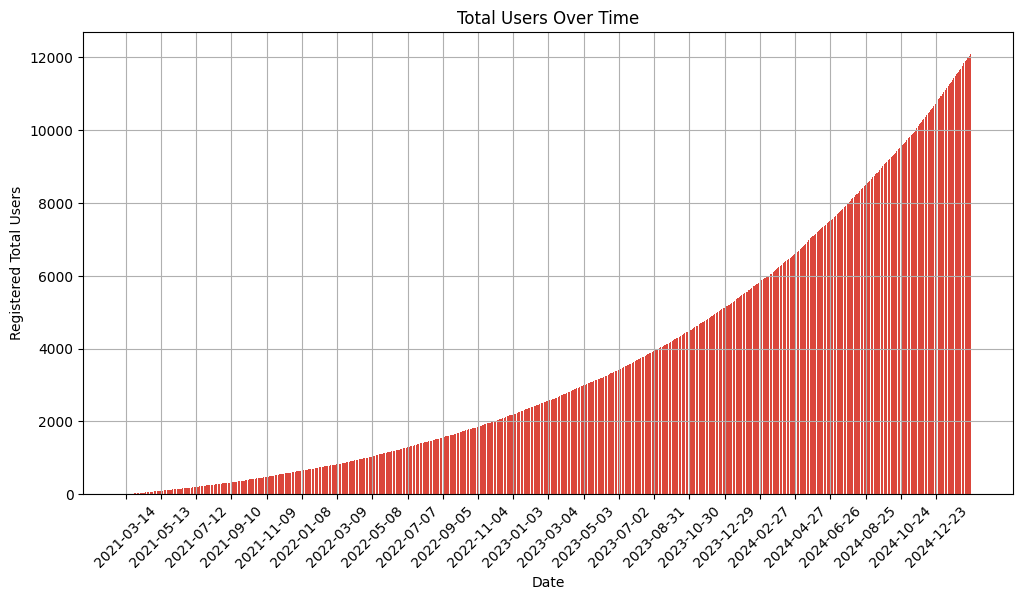

In [43]:
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt

np.random.seed(42)

total_days = 1440
total_users = 12000

# Generate dates from two years ago until today
start_date = datetime.datetime.today() - datetime.timedelta(days=total_days)
dates = [start_date + datetime.timedelta(days=i) for i in range(total_days)]

y_registrations = np.zeros(total_days)
y_total = np.zeros(total_days)

total_registrations = 0

# Generate total users by day
for i in range(total_days):
    # y_registrations[i] = (np.exp(i * 0.00194357) - 1)
    # y_registrations[i] = (np.exp(i * 0.0019815) - 1)
    # y_registrations[i] = (np.exp(i * 0.0019824) - 1)
    y_registrations[i] = (np.exp(i * 0.00199) - 1)
    y_registrations[i] += abs(np.random.normal() * total_registrations * (1 / (i + 1)))
    y_registrations[i] = math.ceil(y_registrations[i])
    total_registrations += y_registrations[i]
    y_total[i] = total_registrations

print("Total Users: {}\n".format(total_users))
print("Total Registrations: {}\n".format(total_registrations))

# Plot
plt.figure(figsize=(12, 6))
plt.bar(dates, y_total, color='#db463b')
plt.title('Total Users Over Time')
plt.xlabel('Date')
plt.ylabel('Registered Total Users')

# Format x-axis with readable date labels
plt.xticks(ticks=dates[::60], labels=[d.strftime('%Y-%m-%d') for d in dates[::60]], rotation=45)

plt.grid()
plt.show()


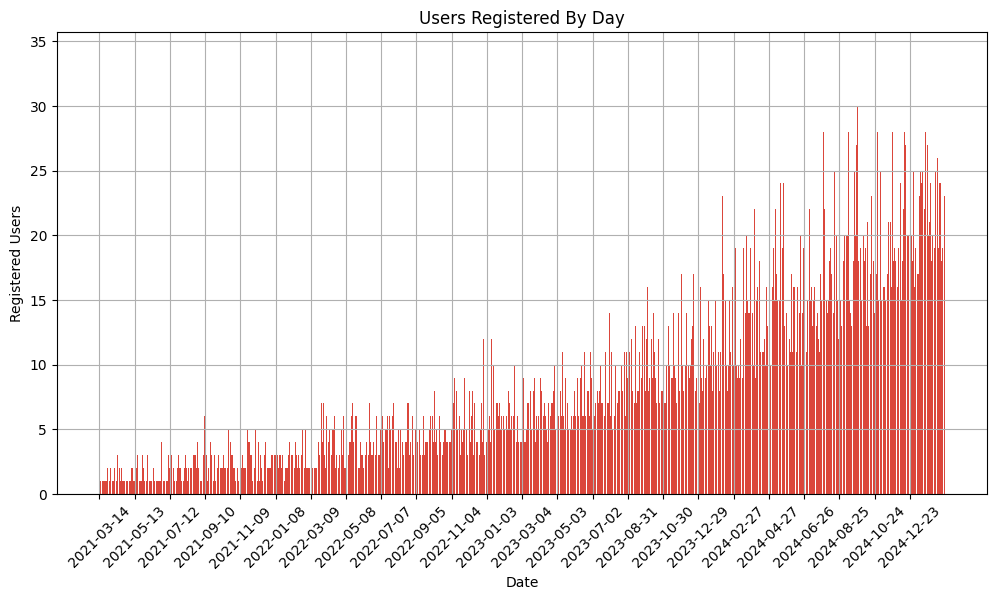

In [44]:
# Plot
plt.figure(figsize=(12, 6))
plt.bar(dates, y_registrations, color='#db463b')
plt.title('Users Registered By Day')
plt.xlabel('Date')
plt.ylabel('Registered Users')

# Format x-axis with readable date labels
plt.xticks(ticks=dates[::60], labels=[d.strftime('%Y-%m-%d') for d in dates[::60]], rotation=45)

plt.grid()
plt.show()

In [45]:
import pandas as pd

# to csv
df = pd.DataFrame({'date': list(map(lambda full_date: full_date.date(), dates)), 'registered_users': y_registrations})

dates_list = []

# Iterate through the DataFrame and repeat the age according to the number of users
for index, row in df.iterrows():
    dates_list.extend([row['date']] * int(row['registered_users']))

np.random.shuffle(dates_list)

max_size = 1000

split_dates_list = [dates_list[i:i + max_size] for i in range(0, len(dates_list), max_size)]

for i, sublist in enumerate(split_dates_list):
    age_df = pd.DataFrame({ 'date': sublist })
    age_df.to_csv(f'./user_registration_data/user_registrations_data_{i}.csv', index=False, header=False)